In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Question 1:**

In [2]:
## Comment for prof.: In case you want to re-run anything, please change the directory accordingly. I just used Google Colab because it's easier.
bank_df = pd.read_csv('/content/drive/MyDrive/bank_marketing.csv')
bank_df.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Pdays,Poutcome,Outcome
0,58.0,management,married,tertiary,no,2143,yes,no,cellular,-1,NaN,no
1,44.0,technician,single,secondary,no,29,yes,no,cellular,-1,NaN,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,cellular,-1,NaN,no
3,47.0,blue-collar,married,NaN,no,1506,yes,no,cellular,-1,NaN,no
4,NaN,NaN,single,NaN,no,1,no,no,cellular,-1,NaN,no


In [3]:
print(bank_df.dtypes)
print(bank_df.nunique(axis=0))

Age          float64
Job           object
Marital       object
Education     object
Default       object
Balance        int64
Housing       object
Loan          object
Contact       object
Pdays          int64
Poutcome      object
Outcome       object
dtype: object
Age            77
Job            10
Marital         3
Education       3
Default         2
Balance      7168
Housing         2
Loan            2
Contact         2
Pdays         559
Poutcome        3
Outcome         2
dtype: int64


We have 12 features.

**Categorical Variables:**
- Job
- Marital Status
- Education
- Default
- Housing
- Loan
- Contact
- P outcome
- Outcome


**Numerical Variables:**
- Age (Continuous, ratio; since it is any value within a range and there is a true zero defined)
- Balance (Continuous, ratio; since true zero is defined, any value within a range)
- P days (Discrete, ratio; number of days is integer values and cannot be continuous. There is a true 0)



In [4]:
for col in ['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Poutcome', 'Outcome']:
  print(f'{bank_df[col].value_counts()}\n')

Job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
housemaid        1240
student           938
Name: count, dtype: int64

Marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64

Default
no     43509
yes      815
Name: count, dtype: int64

Housing
yes    25130
no     20081
Name: count, dtype: int64

Loan
no     37967
yes     7244
Name: count, dtype: int64

Contact
cellular     41285
telephone     2906
Name: count, dtype: int64

Poutcome
failure    4901
other      1840
success    1511
Name: count, dtype: int64

Outcome
no     39922
yes     5289
Name: count, dtype: int64



**Categorical features with order:**
- Education (primary, secondary and tertiary)

The remainder of the features do not have an order and are therefore nominal.

*   **Nominal features**: Job, Marital, Default, Housing, Loan, Contact, Poutcome, Outcome
*   **Ordinal features**: Education

# **Question 2:**

In [5]:
def plot_numerical(col):
    print(bank_df[col].describe())
    sns.histplot(bank_df[col], kde=True)
    plt.title(f"{col} Histogram")
    plt.show()

In [6]:
def plot_categorical(col):
    plt.figure(figsize=(15, 4))
    sns.countplot(data=bank_df, x=col)
    plt.title(f"{col} Bar Plot")
    plt.show()

**Categorical Features**

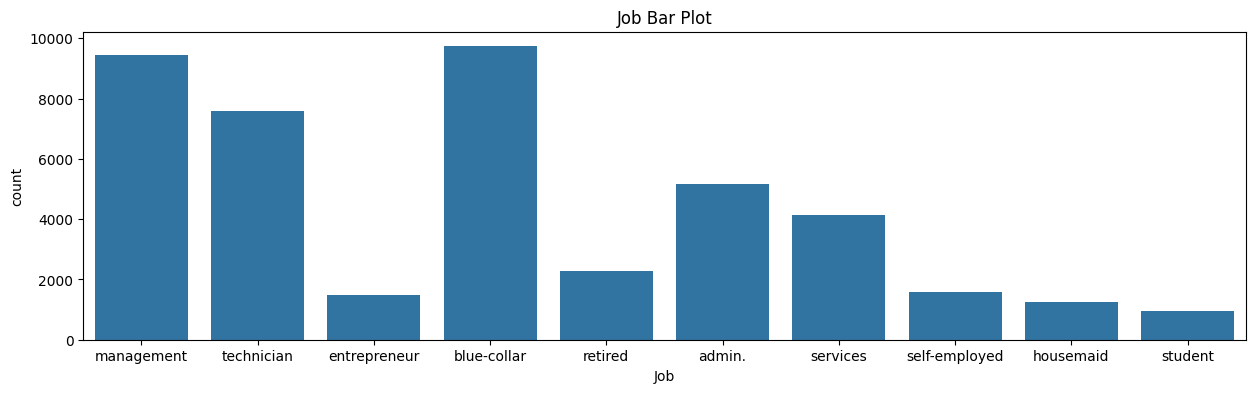

----------------------------------------------------------------------------------------------------


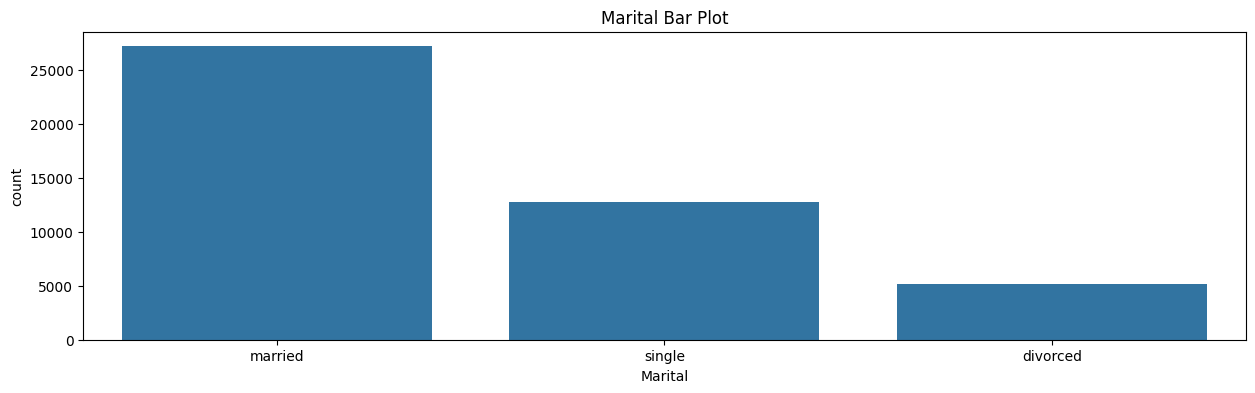

----------------------------------------------------------------------------------------------------


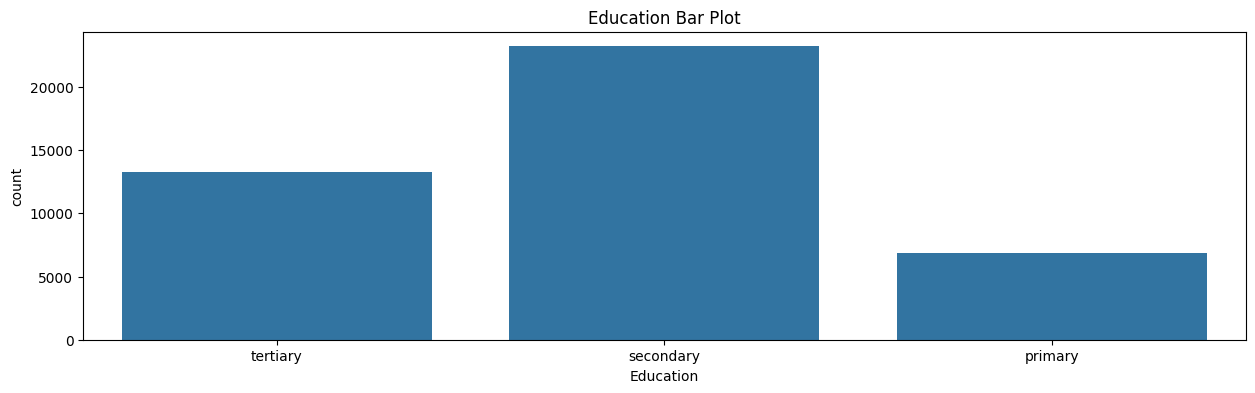

----------------------------------------------------------------------------------------------------


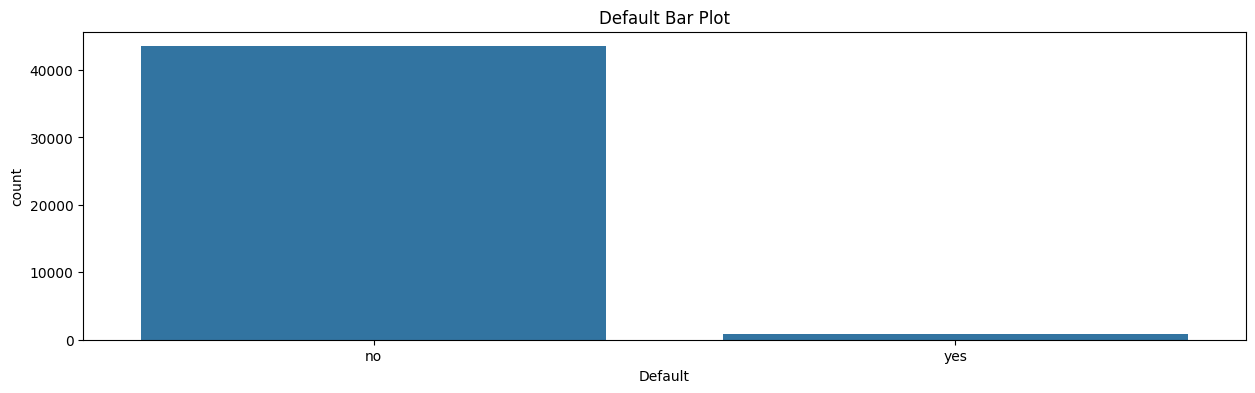

----------------------------------------------------------------------------------------------------


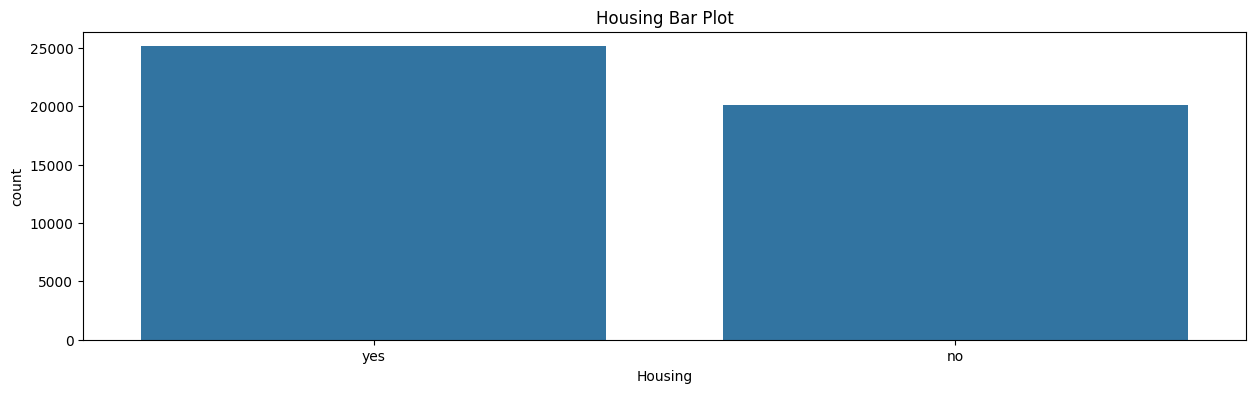

----------------------------------------------------------------------------------------------------


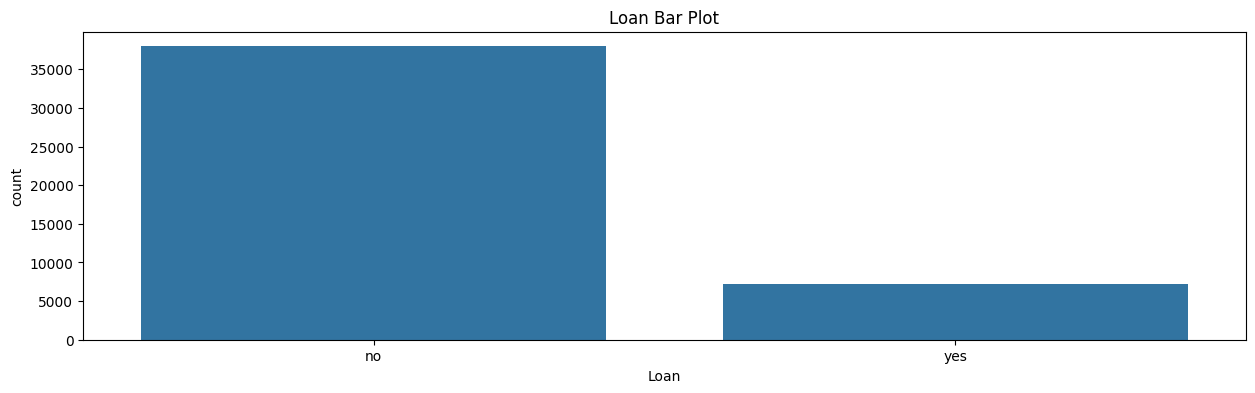

----------------------------------------------------------------------------------------------------


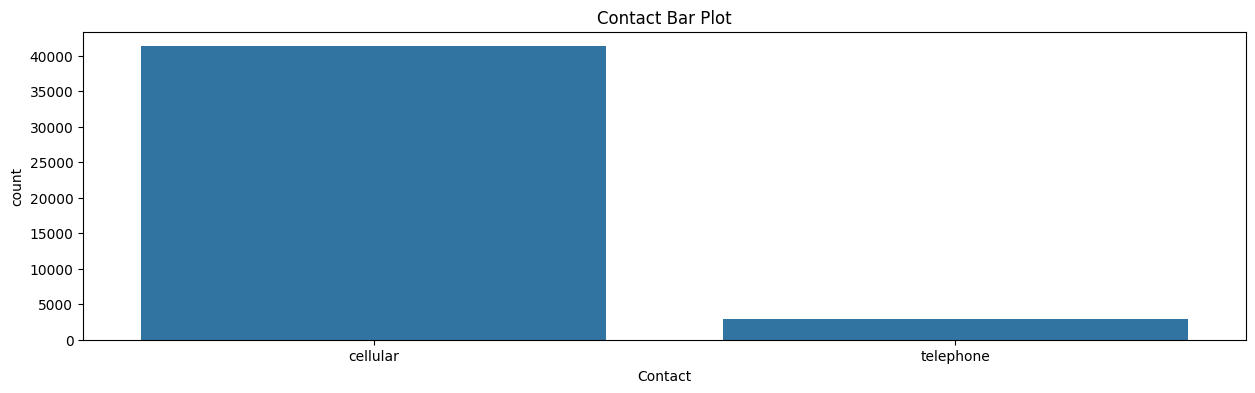

----------------------------------------------------------------------------------------------------


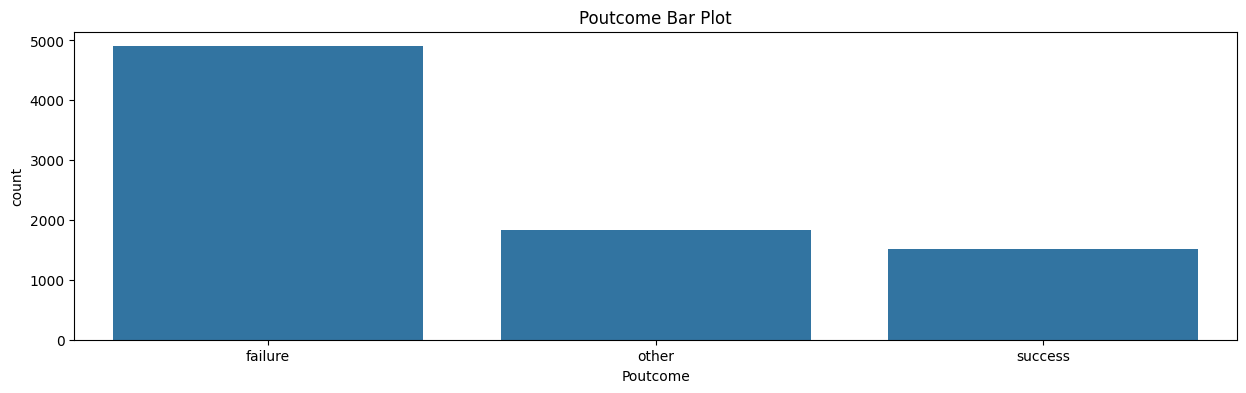

----------------------------------------------------------------------------------------------------


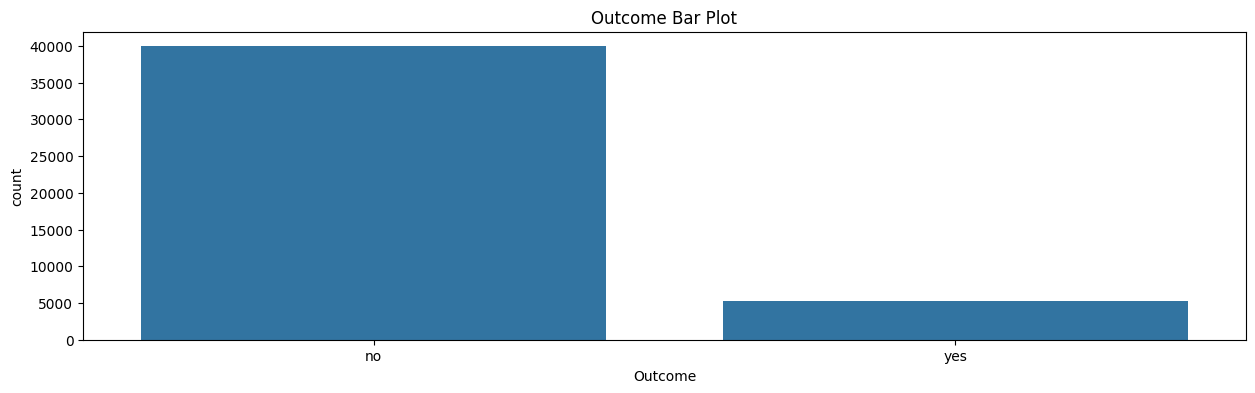

----------------------------------------------------------------------------------------------------


In [9]:
for col in ['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Poutcome', 'Outcome']:
  plot_categorical(col)
  print('-'*100)

- Job: The majority of clients are blue-collared workers.

- Marital status: Most clients are married.

- Education: Most clients are married, less than half are single and an even smaller portion are divorced.

- Default: The majority of clients have not defaulted on their payments

- Housing: More clients have housing loans than those who do not, but there is an (almost) equal balance between the two

- Loan: The majority of clients do not have loans

- Contact: Most clients are accessible and can be contacted, by a majority.

- P outcome: The previous marketing campaign was **not** successful for the majority of clients. This indicates a need for a change in strategy, with only a small percentage resulting in successes with the old campaign.

- Outcome: The large majority of clients did not substract to the new product.

**Numerical Features:**

count    42951.000000
mean        40.924426
std         10.624198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: Age, dtype: float64


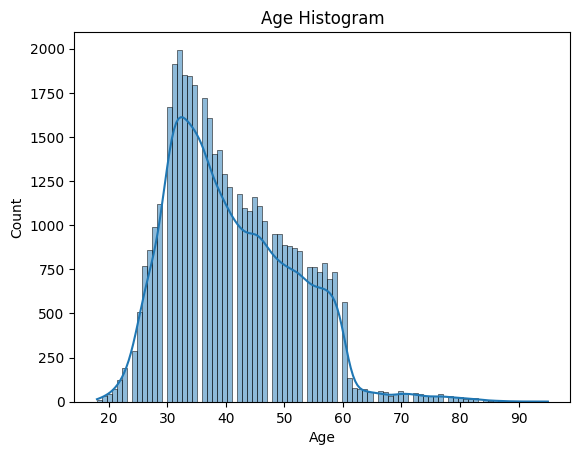

----------------------------------------------------------------------------------------------------
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: Balance, dtype: float64


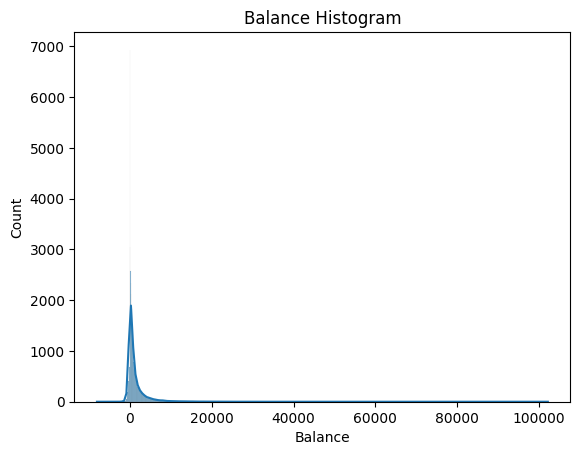

----------------------------------------------------------------------------------------------------
count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: Pdays, dtype: float64


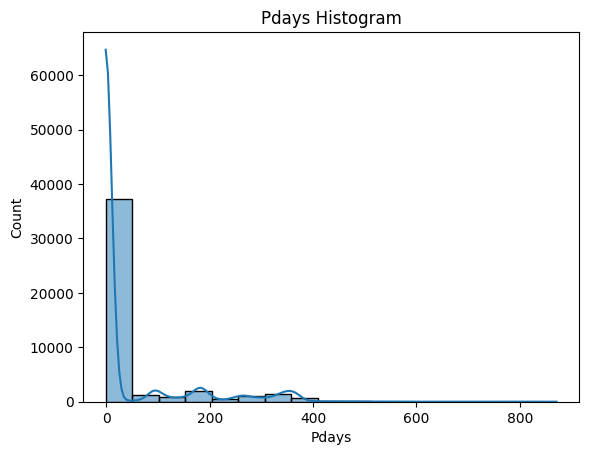

----------------------------------------------------------------------------------------------------


In [8]:
for col in ['Age', 'Balance', 'Pdays']:
  plot_numerical(col)
  print("-"*100)

- Age:

The age is skewed to the right, meaning that the majority of the data includes younger people, with a mean age of ~41 years old. Data ranges from between 18 years old to 95 years old despite this concentration towards younger people, with sub-100 people per age past the mid-60s. There are only a few individuals that whose ages are actually as high as 95. Therefore, we could say that anything above the age of 62 can be considered an outlier.

- Balance:

The average balance is 1362.272058 and the data is heavily skewed right (much more than the age), meaning that only a few people are in the top percentages of balance. There is a large disparity between the min and max values with a huge standard deviation.

- P days:

With a mean of around 40 and a standard deviation of 100, we can see the difference between the mean and the median values, which is also an indication of skewedness. The data is once again right-skewed with a maximum value of 871, which is a huge delay in contacting clients. The majority of the clients were, however, contacted within the first few days.

There is no indication of normality for any of the numerical features, as they are all right-skewed.

# **Question 3:**

In [10]:
print(bank_df.isnull().sum())

Age           2260
Job           1591
Marital          0
Education     1857
Default        887
Balance          0
Housing          0
Loan             0
Contact       1020
Pdays            0
Poutcome     36959
Outcome          0
dtype: int64


Default, balance, housing, loan, P days and outcome are not missing from the data and therefore do not need to be imputed. There is a heavy concentration of missing values for the age, job, education and contact. However, these can be imputed based on recurrance within the dataset.

The P outcome contains missing values for the majority of the dataset (almost 37,000 out of a dataset of size ~40,000). Implicitly, this can be attributed to the fact that most clients were not contacted in previous campaigns.

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

The imputation strategy for each of the columns can be found below:

In [13]:
imputer_median = SimpleImputer(strategy='mean')
imputer_mode = SimpleImputer(strategy='most_frequent')

- Age: The mean age will be used to impute missing values



In [14]:
bank_df['Age'] = imputer_median.fit_transform(bank_df[['Age']])

- Job, education, default and contact: The most frequent of each categorical feature will replace the missing values implicitly, as they are categorical (there is no mean value, only a most frequently-occurring / mode).

In [ ]:
bank_df['Job'] = imputer_mode.fit_transform(bank_df[['Job']]).ravel()
bank_df['Education'] = imputer_mode.fit_transform(bank_df[['Education']]).ravel()
bank_df['Default'] = imputer_mode.fit_transform(bank_df[['Default']]).ravel()
bank_df['Contact'] = imputer_mode.fit_transform(bank_df[['Contact']]).ravel()

Since we have too many missing values for the P outcome, it would not accurately reflect the data if we impute based on only the ~4,000 values. Therefore, it would make more sense to drop the feature completely.

In [ ]:
bank_df = bank_df.drop(['Poutcome'], axis=1)

# **Question 4:**

We use the Pearson and Spearman correlations for the numerical features, and for categorical features, we contact the χ^2 test.

In [15]:
from scipy.stats import pearsonr, spearmanr, chi2_contingency

In [31]:
def numerical_correlations(p1, p2):
  pearson_corr, pearson_p = pearsonr(bank_df[p1], bank_df[p2])
  spearman_corr, spearman_p = spearmanr(bank_df[p1], bank_df[p2])

  print("--------------------Pearson--------------------")
  print(f"Pearson correlation between {p1} and {p2}: {pearson_corr}, \n p-value: {pearson_p}")
  print("--------------------Spearman--------------------")
  print(f"Spearman correlation between {p1} and {p2}: {spearman_corr}, \n p-value: {spearman_p}")

In [32]:
numeric = ['Age', 'Balance', 'Pdays']

for i, p1 in enumerate(numeric):
  for p2 in numeric[i+1:]:
    numerical_correlations(p1, p2)
    print("\n")
    print("-"*100)
    print("-"*100)
    print("\n")

--------------------Pearson--------------------
Pearson correlation between Age and Balance: 0.0965891276070834, 
 p-value: 3.724621339721931e-94
--------------------Spearman--------------------
Spearman correlation between Age and Balance: 0.09414519135657995, 
 p-value: 1.5859617483227062e-89


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


--------------------Pearson--------------------
Pearson correlation between Age and Pdays: -0.023881074568043767, 
 p-value: 3.80651430053574e-07
--------------------Spearman--------------------
Spearman correlation between Age and Pdays: -0.018115226410233057, 
 p-value: 0.00011714356285237106


----------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------

*   **Null Hypothesis**: There is no correlation between two numerical features.
*   **Alternative Hypothesis**: There is some correlation between two numerical features.

Correlation values are close to 0, indicating that there is weak correlation between the numerical features. Therefore, they can all be kept as there is little to no redundancy. The small P-values also indicate that we fail to reject the null hypothesis and the correlation coefficients are accurate, except for the correlation between balance and P days using Pearson's correlation, where we reject the null hypothesis.

A little more to add:

- Age and Balance: weak positive correlation with both the Spearman and the Pearson correlation algos.
- Age and P days: weak negative correlation with both the Spearman and Pearson correlation algos., but there is a (relatively) stronger weak correlation according to the Pearson algo.
- Balance and P days: Weak positive correlation with both algos., but with a high P-value with Pearson's correlation (whereas Spearman's correlation has a significantly smaller P-value). This does nto mean that the weak correlation is invalid. It cab be attributed to the fact that Spearman's correlation is an entire order of magnitude bigger than Pearson's, meaning that the weak positive correlation calculated there is more _accurate_.

In [33]:
def categorical_correlations(p1, p2):
    contingency_table = pd.crosstab(bank_df[p1], bank_df[p2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f'{p1} and {p2}:')
    print("Chi-squared Test Statistic: {}".format(chi2))
    print("p-value: {}".format(p))
    print("Degrees of Freedom: {}".format(dof))
    if (p > 0.05):
      print('----- p-value is > 0.05 ------')
    print('')

In [35]:
categ = ['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Outcome']

for i, p1 in enumerate(categ):
  for p2 in categ[i+1:]:
    print("-"*100)
    categorical_correlations(p1, p2)
    print("-"*100)

----------------------------------------------------------------------------------------------------
Job and Marital:
Chi-squared Test Statistic: 3816.213723908872
p-value: 0.0
Degrees of Freedom: 18

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Job and Education:
Chi-squared Test Statistic: 26490.147257973313
p-value: 0.0
Degrees of Freedom: 18

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Job and Default:
Chi-squared Test Statistic: 56.70107234644534
p-value: 5.765097720446753e-09
Degrees of Freedom: 9

----------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------

The hypotheses used for testing correlation between categorical features:

*   **Null Hypothesis**: There is no correlation between two categorical features.
*   **Alternative Hypothesis**: There is some correlation between the two categorical features.

Naturally, P-values above 5% (i.e. p_value > 0.05) will result in us failing to reject the null hypothesis, as with the numerical features.

The only case where we are able to reject the null hypothesis is between Default and Housing. This means there is a lack of evidence to suggest that the two features display correlation.

On the other hand, the following pairs of categorical features have P-values below 5% (0.05), meaning that we reject the null hypothesis. Therefore, there is enough evidence to suggest a correlation between the two categorical features.

- Job, Education
- P outcome, Outcome
- Job, Marital Status
- Job, Housing
- Education, Marital Status

Out of the 5 comparisons, the "Job" feature appears in three, meaning that there is sufficient evidence to drop the feature from the data as the outcomes are represented with other features.

In [36]:
bank_df = bank_df.drop(['Job'], axis=1)

# **Question 5:**

We will scale the numerical features (as they are numerical, obviously) using the standard scaler. Other scaling techniques such as min-max scaling can also be used.

In [37]:
numeric = ['Age', 'Balance', 'Pdays']

In [38]:
scaler = StandardScaler()
bank_df[numeric] = scaler.fit_transform(bank_df[numeric])

For categorical features, we use different encoding techniques based on whether the data is nominal or ordinal.

- For nominal ('Marital', 'Default', 'Housing', 'Loan', 'Contact', 'Outcome'), we use one-hot encoding, as there is no order or hierarchy in any of the features
- For ordinal ('Education'), we use ordinal encoding.

In [40]:
nominal = ['Marital', 'Default', 'Housing', 'Loan', 'Contact', 'Outcome']

In [41]:
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_nominal = onehot_encoder.fit_transform(bank_df[nominal])
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=onehot_encoder.get_feature_names_out(nominal))

In [42]:
ordinal = ['Education']

In [43]:
ordinal_encoder = OrdinalEncoder()
encoded_ordinal = ordinal_encoder.fit_transform(bank_df[ordinal])
encoded_ordinal_df = pd.DataFrame(encoded_ordinal, columns=ordinal)

In [44]:
bank_df = bank_df.drop(nominal + ordinal, axis=1)
bank_df_final = pd.concat([bank_df, encoded_nominal_df, encoded_ordinal_df], axis=1)
bank_df_final.head()

,Age,Balance,Pdays,Poutcome,Marital_married,Marital_single,Default_yes,Default_nan,Housing_yes,Loan_yes,Contact_telephone,Contact_nan,Outcome_yes,Education
0,1.648996,0.256419,-0.411453,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,0.297010,-0.437895,-0.411453,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.765265,-0.446762,-0.411453,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.586721,0.047205,-0.411453,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
4,0.000000,-0.447091,-0.411453,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


# **Question 6:**

In [45]:
print(bank_df_final.shape)

(45211, 14)

In [47]:
bank_df_final

,Age,Balance,Pdays,Poutcome,Marital_married,Marital_single,Default_yes,Default_nan,Housing_yes,Loan_yes,Contact_telephone,Contact_nan,Outcome_yes,Education
0,1.648996,0.256419,-0.411453,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,0.297010,-0.437895,-0.411453,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.765265,-0.446762,-0.411453,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.586721,0.047205,-0.411453,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
4,0.000000,-0.447091,-0.411453,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.973003,-0.176460,-0.411453,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
45207,2.904412,0.120447,-0.411453,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45208,3.000983,1.429593,1.436189,success,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
45209,1.552426,-0.228024,-0.411453,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
